<p style="border:2px solid black"> </p>
<span style="font-family:Lucida Bright;">
<p style="margin-bottom:1cm"></p>
<center>
<font size="7"><b>Social Data Analysis and Visualization</b></font>
<p style="margin-bottom:1cm"></p>
<font size="3"><b>Final Project</b></font>
<p style="margin-bottom:1cm"></p>
<font size="6"><b>Demographics of Copenhagen</b></font>
<p style="margin-bottom:0.8cm"></p>
<font size="3"><b>Wojciech Mazurkiewicz, DTU, 14 May 2021</b></font>
<p style="margin-bottom:1.5cm"></p>
<font size="6"><b>Data Visualization</b></font>
<br>
<font size="3"><b></b></font>
</center>
<p style="margin-bottom:0.7cm"></p>
<p style="border:2px solid black"> </p>

# How to read this notebook

<p style="border:2px solid black"> </p>

Please note that the pre-rendered outputs will first display properly when the notebook is __trusted__.

If you are viewing the HTML-version of the notebook and would like to download the .ipynm file, you can do it [here](https://social-data-analysis-and-visualization-final-project.s3.eu-central-1.amazonaws.com/data_visualization.ipynb).

# Introduction

<p style="border:2px solid black"> </p>

This notebook aims to describe the process of loading and cleaning of the data about different demographical quantites for Copehhagen. Each demographical quantity is described in its own section, and, at the end, the clean data is saved to hard drive in the form of pickled Pandas dataframes.

The data about the different demographical quantities for Copenhagen has been obtained from https://kk.statistikbank.dk. As the web interface only permits a withdrawal of 50,000 cells at a time, it was in many cases necessary to split the data into multiple smaller tables, that needed reassembling. Also, the format and resolution of the data representing the same quantities, such as age and time, was not always consistent, thus a major effort has been invested into cleaning and streamlining the data. 

I have aimed to focus only on data which would allow to trace the change of different demographical quantities in different districts of Copenhagen over time. This quantities include:

1. citizenzhip (danes vs. western and non-western non-danes)
2. marital status
3. family type and children
5. income
6. life span
7. population movement data (immigration, births, deaths, etc.)

However, out of sheer interest, I have also included the information about the entire population of Copenhagen by the country of origin.

# Initialization

<p style="border:2px solid black"> </p>

The initialization procedure, including the definitions of many the functions that will be used to load and clean the data in this notebook, is defined in the [Initialization notebook](https://social-data-analysis-and-visualization-final-project.s3.eu-central-1.amazonaws.com/initialization.html). Let's run it now:

In [33]:
%run ./initialization.ipynb

Loading BokehJS ...

# Load data

<p style="border:2px solid black"> </p>

In [34]:
cph_data = CphData()

# Country of origin (without district information)

<p style="border:2px solid black"> </p>

## Load data

Let's load the data.

In [35]:
# Load the data containing information about the population
# of Copenhagen by the country of origin.
df_country = cph_data.country_of_origin

# Show dataframe.
display(df_country)

,Year,Quarter,Sex,Age,Country of origin,Number of people
0,2008,4,Men,0-9 years,Abu Dhabi,0.0
1,2009,4,Men,0-9 years,Abu Dhabi,0.0
2,2010,4,Men,0-9 years,Abu Dhabi,0.0
3,2011,4,Men,0-9 years,Abu Dhabi,0.0
4,2012,4,Men,0-9 years,Abu Dhabi,0.0
...,...,...,...,...,...,...
61875,2016,4,Women,>= 90 years,Zimbabwe,0.0
61876,2017,4,Women,>= 90 years,Zimbabwe,0.0
61877,2018,4,Women,>= 90 years,Zimbabwe,0.0
61878,2019,4,Women,>= 90 years,Zimbabwe,0.0


## Show data

#### Population by country of origin vs year

Drop 2008 to set the number of available years to 12 for convenience of viewing.

In [36]:
df_country = df_country[df_country['Year'] != 2008]
display(df_country)

,Year,Quarter,Sex,Age,Country of origin,Number of people
1,2009,4,Men,0-9 years,Abu Dhabi,0.0
2,2010,4,Men,0-9 years,Abu Dhabi,0.0
3,2011,4,Men,0-9 years,Abu Dhabi,0.0
4,2012,4,Men,0-9 years,Abu Dhabi,0.0
5,2013,4,Men,0-9 years,Abu Dhabi,0.0
...,...,...,...,...,...,...
61875,2016,4,Women,>= 90 years,Zimbabwe,0.0
61876,2017,4,Women,>= 90 years,Zimbabwe,0.0
61877,2018,4,Women,>= 90 years,Zimbabwe,0.0
61878,2019,4,Women,>= 90 years,Zimbabwe,0.0


Get the population for each country for each year):

In [37]:
# Create a dataframe where each row represents a year and each columnn
df_country_vs_year = (
    df_country
    .loc[:,
         ['Year', 'Country of origin', 'Number of people']]
    .groupby(['Year', 'Country of origin'])
    .sum()
    .unstack(level=1)
    .droplevel(0, axis=1)
)

display(df_country_vs_year)

Country of origin,Abu Dhabi,Afghanistan,Africa not stated,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia not stated,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British West Indies,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Democratic Republic","Congo, Republic",Cook Islands,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,Dubai,East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswantini,Ethiopia,Europe not stated,Falkland Islands,Fiji,Finland,France,French Guiana,French West Indies,French territories in the Pacific,GDR,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indochina,Indonesia,Iran,Iraq,Ireland,...,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Zealand,Nicaragua,Niger,Nigeria,North America not stated,North Korea,North Yemen,Northern Ireland,Norway,Not stated,Oman,Pacific Islands,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of North Macedonia,Reunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Serbia and Montenegro,Seychelles,Sierra Leone,Sikkim,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South and central America not stated,Southwest Africa,Soviet Union,Spain,Spanish territories in Africa,Sri Lanka,Stateless,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Tonga,Total,Trinidad and Tobago,Trucial Oman,Tunisia,Turkey,Turkmenistan,Tuvalu,USA,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Vatican City State,Venezuela,Vietnam,West Indies,West bank and Gaza,Yemen,Yugoslavia,"Yugoslavia, Federal Republic",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,0.0,"1,168.0",16.0,54.0,587.0,0.0,44.0,0.0,298.0,147.0,0.0,7.0,595.0,292.0,59.0,1.0,20.0,383.0,9.0,65.0,242.0,1.0,14.0,0.0,11.0,61.0,"1,661.0",5.0,651.0,0.0,2.0,546.0,12.0,98.0,47.0,128.0,582.0,8.0,3.0,1.0,490.0,"3,185.0",207.0,7.0,29.0,38.0,0.0,30.0,213.0,163.0,0.0,21.0,191.0,176.0,"413,053.0",32.0,3.0,17.0,0.0,0.0,100.0,750.0,11.0,0.0,116.0,240.0,5.0,480.0,9.0,0.0,2.0,974.0,"1,804.0",0.0,0.0,0.0,0.0,3.0,347.0,39.0,"3,852.0",583.0,411.0,2.0,0.0,43.0,50.0,26.0,20.0,8.0,31.0,0.0,564.0,"1,943.0","2,117.0",0.0,151.0,"3,110.0","6,273.0",371.0,...,"4,898.0",42.0,42.0,8.0,0.0,738.0,686.0,0.0,154.0,29.0,4.0,301.0,0.0,26.0,0.0,0.0,"3,611.0",110.0,1.0,0.0,"8,457.0",12.0,1.0,11.0,245.0,"2,075.0","4,562.0",418.0,0.0,1.0,"1,801.0",0.0,827.0,942.0,43.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,52.0,47.0,63.0,36.0,2.0,133.0,0.0,178.0,197.0,63.0,0.0,"4,329.0",219.0,222.0,0.0,2.0,0.0,393.0,"1,271.0",0.0,310.0,138.0,179.0,7.0,"4,033.0",387.0,987.0,97.0,8.0,247.0,"1,739.0",57.0,7.0,"526,918.0",34.0,0.0,483.0,"8,067.0",3.0,0.0,"2,502.0",353.0,416.0,40.0,"2,878.0",104.0,39.0,0.0,0.0,99.0,988.0,2.0,0.0,70.0,"4,245.0",111.0,40.0,45.0
2010,0.0,"1,159.0",17.0,67.0,609.0,0.0,38.0,0.0,303.0,147.0,0.0,5.0,653.0,311.0,64.0,2.0,18.0,475.0,8.0,70.0,263.0,4.0,17.0,0.0,10.0,65.0,"1,736.0",5.0,711.0,0.0,2.0,756.0,14.0,104.0,46.0,145.0,650.0,9.0,3.0,1.0,503.0,"3,327.0",217.0,7.0,35.0,39.0,0.0,29.0,231.0,173.0,0.0,22.0,206.0,172.0,"418,837.0",33.0,2.0,18.0,0.0,0.0,109.0,763.0,13.0,0.0,123.0,285.0,5.0,504.0,6.0,0.0,2.0,993.0,"1,961.0",0.0,0.0,0.0,0.0,4.0,354.0,37.0,"4,131.0",620.0,429.0,2.0,0.0,42.0,56.0,

#### Top 10 countries

In [38]:
# Get a list of countries represented in the dataframe,
# Sorted by summarized number of people over the years
countries_sorted_by_number_of_people = (
    df_country_vs_year
    .sum()
    .sort_values(ascending=False)
    .index
    .to_list()
)

# Show the countries sorted by population
# display(countries_sorted_by_number_of_people)

# Years from biggest to smallest.
years = df_country_vs_year.index.to_list()
years.sort(reverse=True)

##### ... by population 

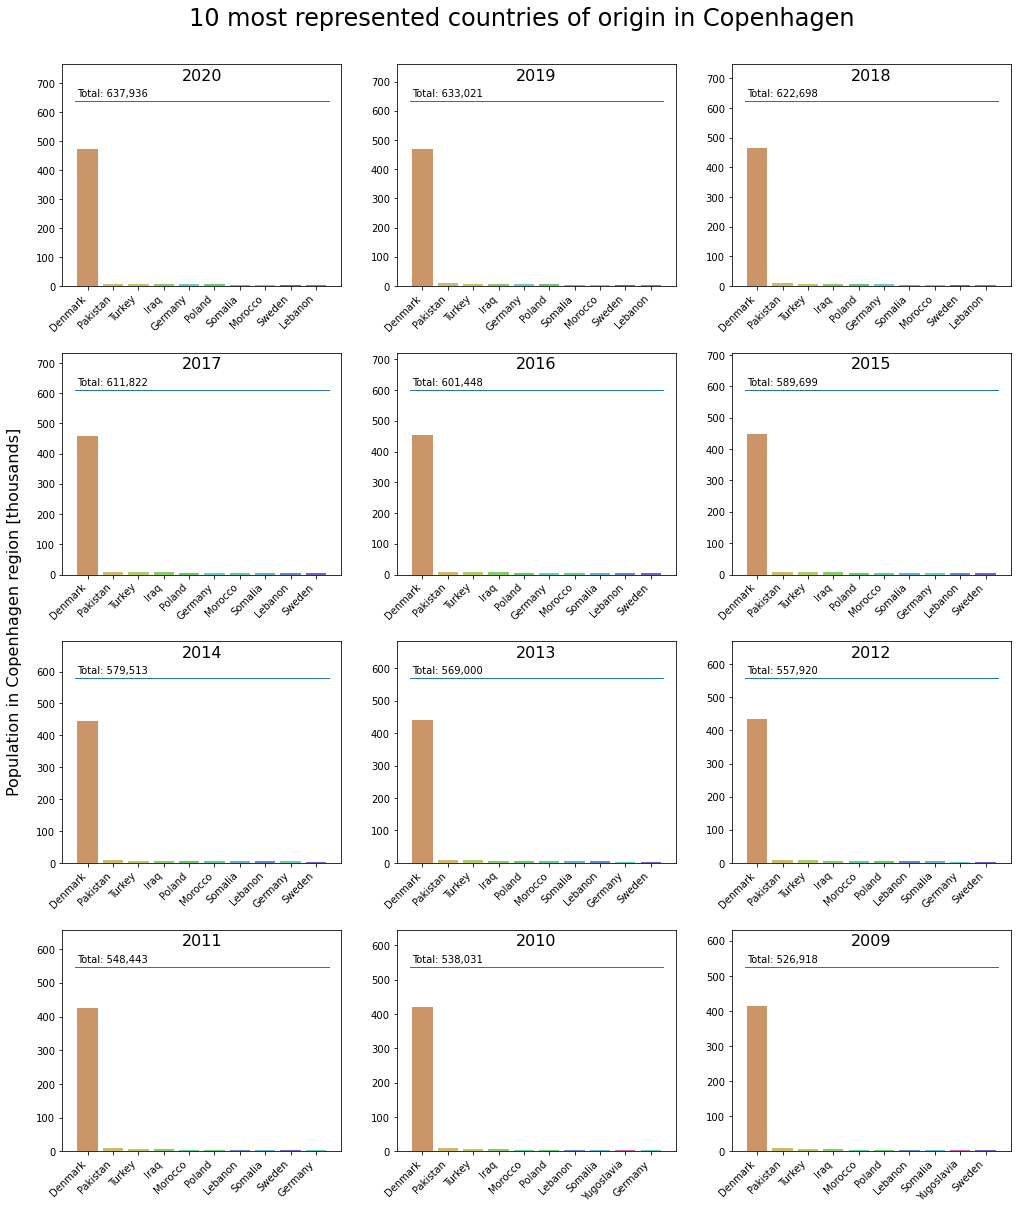

In [39]:
# Get the number of years.
n_years = len(years)

# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a figure for the plots.
figure, all_axes = plt.subplots(
    n_plot_rows, n_plot_columns,
    figsize=(5 * n_plot_columns + 2, 5 * n_plot_rows),
    gridspec_kw={'hspace': 0.3}
)

# Get the handles of the bottom axes'.
bottom_axes = all_axes[-1, :]

# Define colors.
n_countries_to_map = 15
color_palette = sns.color_palette("hls",
                                  n_colors=n_countries_to_map)

# Map the colors to countries.
color_mapping = {country: color
                 for country, color
                 in zip(countries_sorted_by_number_of_people[:n_countries_to_map],
                        color_palette)}

# Plot.
for idx, (year, axes) in enumerate(zip(years, all_axes.ravel()[:n_plots])):

    total = df_country_vs_year.at[year, 'Total']

    sns.barplot(
        data=(
            df_country_vs_year
            .loc[year, ~df_country_vs_year.columns.isin(['Total'])]
            .sort_values(ascending=False)
            .head(10)
            .div(1e3)
            .reset_index()
        ),
        x='Country of origin',
        y=year,
        ax=axes,
        palette=color_mapping)

    # Set the title of the plot.
    axes.set_title(year, y=0.9)
    axes.set_xlabel('')
    axes.set_ylabel('')
    axes.set_ylim([axes.get_ylim()[0], total / 1e3 * 1.2])
    
    draw_threshold(total * 1e-3, axes, title=f'Total: {total:,.0f}')

    # Rotate x tick labels.
    plt.setp(
        axes.get_xticklabels(),
        rotation=45,
        ha='right',
        va='top',
    )

    # Apply the standard formatting.
    format_axes_annotation(axes)

# Annotate the figure.
# figure_x_label(figure, 'Day of week', y_position=0.06)
figure_y_label(figure, 'Population in Copenhagen region [thousands]', x_position=0.08)
figure.suptitle('10 most represented countries of origin in Copenhagen', 
                size=24,
                y=0.92)
figure.set_facecolor("white")

##### ... by percentage 

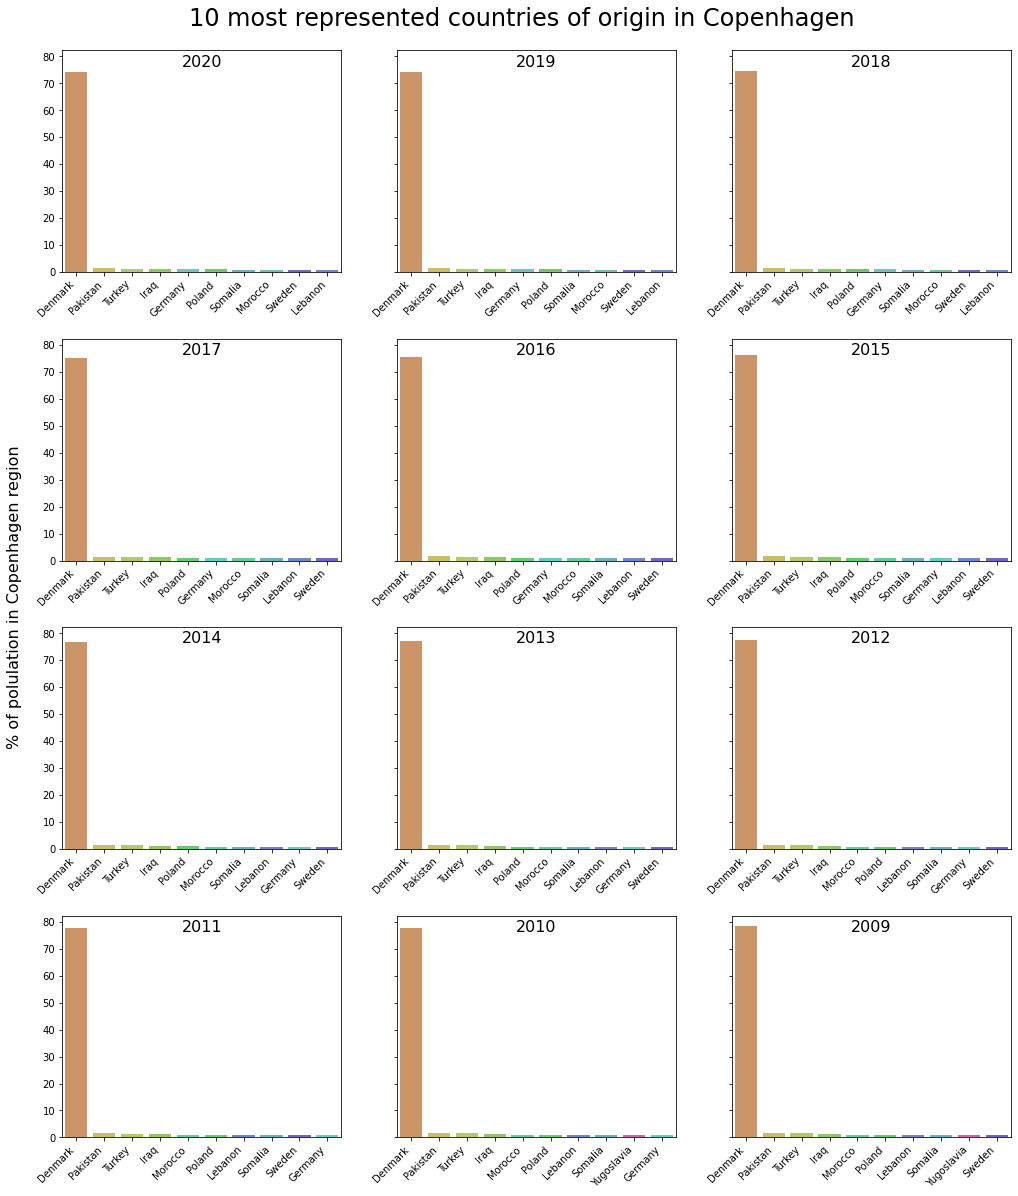

In [40]:
# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a figure for the plots.
figure, all_axes = plt.subplots(
    n_plot_rows, n_plot_columns,
    sharey='all',
    figsize=(5 * n_plot_columns + 2, 5 * n_plot_rows),
    gridspec_kw={'hspace': 0.3}
)

# Get the handles of the bottom axes'.
bottom_axes = all_axes[-1, :]

# Define colors.
n_countries_to_map = 15
color_palette = sns.color_palette("hls",
                                  n_colors=n_countries_to_map)

# Map the colors to countries.
color_mapping = {country: color
                 for country, color
                 in zip(countries_sorted_by_number_of_people[:n_countries_to_map],
                        color_palette)}

# Plot.
for idx, (year, axes) in enumerate(zip(years, all_axes.ravel()[:n_plots])):
    
    # The total number of people in Copenhagen.
    total = df_country_vs_year.at[year, 'Total']
    
    # Show the barplot.
    sns.barplot(
        data=(
            df_country_vs_year
            .loc[year, ~df_country_vs_year.columns.isin(['Total'])]
            .sort_values(ascending=False)
            .head(10)
            .mul(100 / total)
            .reset_index()
        ),
        x='Country of origin',
        y=year,
        ax=axes,
        palette=color_mapping)

    # Set the title of the plot.
    axes.set_title(year, y=0.9)
    axes.set_xlabel('')
    axes.set_ylabel('')

    # Rotate x tick labels.
    plt.setp(
        axes.get_xticklabels(),
        rotation=45,
        ha='right',
        va='top',
    )

    # Apply the standard formatting.
    format_axes_annotation(axes)

# Annotate the figure.
# figure_x_label(figure, 'Day of week', y_position=0.06)
figure_y_label(figure, r'% of polulation in Copenhagen region', x_position=0.08)
figure.suptitle('10 most represented countries of origin in Copenhagen', 
                size=24,
                y=0.91)

figure.set_facecolor("white")

##### Danes vs non-danes 

In [75]:
# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a dataframe with data for danes vs non-danes.
df_danes_vs_non_danes = (
    df_country_vs_year
    .loc[:, 'Denmark']
    .to_frame('Danes')
)

df_danes_vs_non_danes['Non-danes'] = (
    df_country_vs_year
    .loc[:, ~df_country_vs_year.columns.isin(['Total', 'Denmark'])]
    .sum(axis=1)
    .to_frame('Non-danes')
)

df_danes_vs_non_danes[['% Danes', '% Non-danes']] = (
    df_danes_vs_non_danes[['Danes', 'Non-danes']]
    .div(df_danes_vs_non_danes.sum(axis=1), axis=0)
    .mul(100)
)

# Show the dataframe
display(df_danes_vs_non_danes)

,Danes,Non-danes,% Danes,% Non-danes
Year,,,,
2009,"413,053.0","113,865.0",78.4,21.6
2010,"418,837.0","119,194.0",77.8,22.2
2011,"426,377.0","122,066.0",77.7,22.3
2012,"433,433.0","124,487.0",77.7,22.3
2013,"439,824.0","129,176.0",77.3,22.7
2014,"444,817.0","134,696.0",76.8,23.2
2015,"449,463.0","140,236.0",76.2,23.8
2016,"454,826.0","146,622.0",75.6,24.4
2017,"460,071.0","151,751.0",75.2,24.8


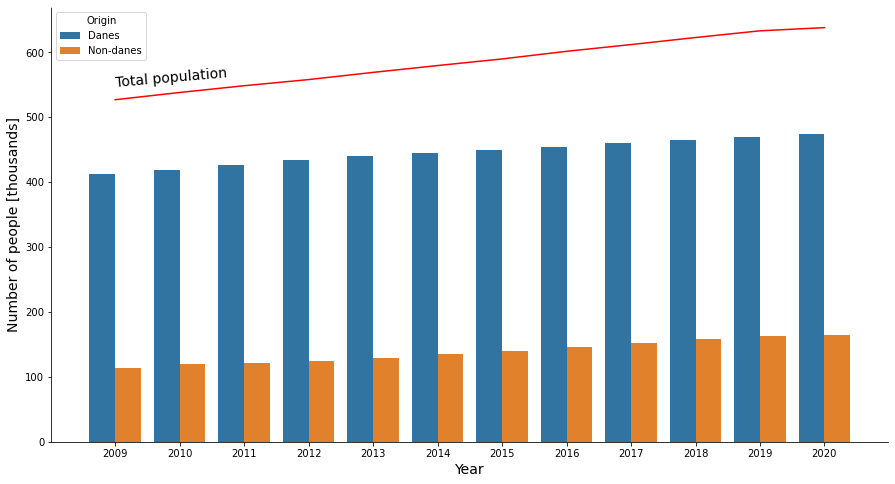

In [86]:
# Create a figure for the plots.
figure, axes = plt.subplots(figsize=(15, 8))

# Create the barplot for each year.
sns.barplot(data=(df_danes_vs_non_danes[['Danes', 'Non-danes']]
                  .div(1e3)
                  .reset_index()
                  .melt(id_vars='Year',
                        var_name='Origin',
                        value_name='Number of people')),
            x='Year',
            y='Number of people',
            hue='Origin',
            ax=axes)

# Total population over the years.
total = (
    df_danes_vs_non_danes[['Danes', 'Non-danes']]
    .div(1e3)
    .sum(axis=1)
    .to_numpy()
)

axes.plot(df_danes_vs_non_danes[['Danes', 'Non-danes']].div(1e3).sum(axis=1).to_numpy(),
          color='red')

axes.set_ylabel('Number of people [thousands]')
axes.text(0, total[0] + 20, 'Total population', rotation = 5, size=14)

format_axes(axes)
format_axes_annotation(axes)
figure.set_facecolor("white")

# Save the plot.
figure.savefig(path_results_root / 'total_population_danes_vs_non_danes_absolute.png')


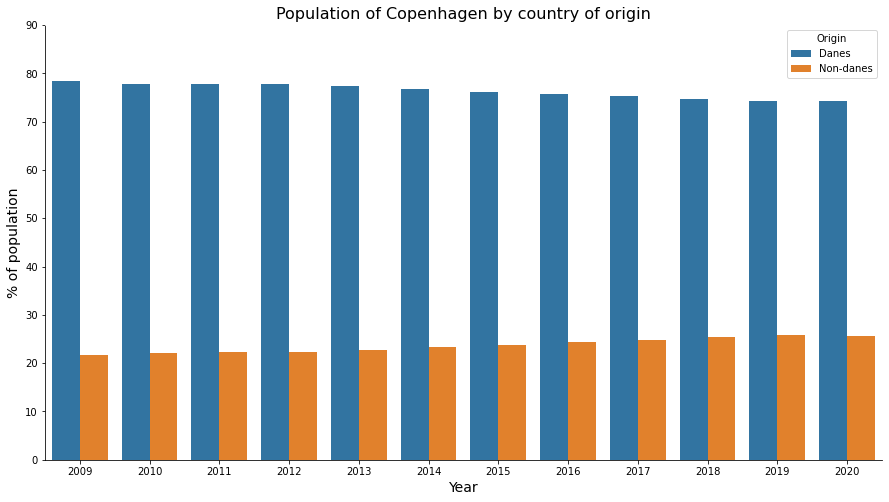

In [87]:
# Create a figure for the plots.
figure, axes = plt.subplots(figsize=(15, 8))

# Create the barplot for each year.
sns.barplot(data=(df_danes_vs_non_danes[['% Danes', '% Non-danes']]
                  .rename(columns={'% Danes': 'Danes',
                                   '% Non-danes': 'Non-danes'})
                  .reset_index()
                  .melt(id_vars='Year',
                        var_name='Origin',
                        value_name='% of population')),
            x='Year',
            y='% of population',
            hue='Origin',
            ax=axes)

# Set axes limits (to make room for the legend)
axes.set_ylim((0, 90))
axes.set_title('Population of Copenhagen by country of origin')

format_axes(axes)
format_axes_annotation(axes)
figure.set_facecolor("white")

# Save the plot.
figure.savefig(path_results_root /
               'total_population_danes_vs_non_danes_pct.png')

### Plotly

In [101]:
from plotly.graph_objs import Layout

df_danes_non_danes_pct = (
    df_danes_vs_non_danes[['% Danes', '% Non-danes']]
    .rename(columns={'% Danes': 'Danes',
                     '% Non-danes': 'Non-danes'})
    .reset_index()
    .melt(id_vars='Year',
          var_name='Origin',
          value_name='% of population')
)

# display(df_danes_non_danes_pct)

# layout = Layout(
#     title='Your Title',
#     paper_bgcolor='rgb(0, 0, 0)',  # set the background colour

# )

# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(
    df_danes_non_danes_pct,
    x='Year',
    y='% of population',
    color='Origin',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.D3
)

fig.update_layout(
    dict(plot_bgcolor='rgb(256, 256, 256)',
         paper_bgcolor='rgb(256, 256, 256)',
         title=dict(text="Population of Copenhagen",
                    x=0.5,
                    xanchor='center',
                    yanchor='top'),
         xaxis=dict(tickmode='linear',
#                     tick0=0.5,
                    dtick=1)
         )
)


fig.show()
fig.write_html(str(
    path_results_root / 'total_population_danes_vs_non_danes_pct.html'))

<p style="border:2px solid black"> </p>

# Citizenship (with district)

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF8

## Load data

In [ ]:
# Get file paths to all the paths.
paths_csv = [path_csv
             for path_csv in path_data_citizenship_root.glob('**/*.csv')
             if path_csv.is_file()]

# Load the dataframe from files.
df_citizenship_raw = load_split_dataframe(paths_csv)

# Show the dataframe
display(df_citizenship_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_citizenship = clean_cph_dataframe(df_citizenship_raw,
                                     value_name='Number of people',
                                     df_name='Citizenship')

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Sex', 'Age', 'Citizenship']
df_citizenship = set_data_types(df_citizenship, columns_int, columns_str)

# Save the clean data.
df_citizenship.to_pickle(path_data_clean_root /
                         'cph_population_by_citizenship.pkl')

# Show the dataframe.
display(df_citizenship)

## Show statistics

In [ ]:
show_stats(df_citizenship)

<p style="border:2px solid black"> </p>

# Marital status (with district)

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF1

## Load data

In [ ]:
# Get file paths to all the paths.
paths_csv = [path_csv
             for path_csv in path_data_marital_status_root.glob('**/*.csv')
             if path_csv.is_file()]

# Load the dataframe from files.
df_marital_status_raw = load_split_dataframe(paths_csv)

# Show the dataframe.
display(df_marital_status_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_marital_status = clean_cph_dataframe(
    df_marital_status_raw,
    value_name='Number of people',
    df_name='Marital status w. district'
)

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Sex', 'Age', 'Marital status']
df_marital_status = set_data_types(df_marital_status, columns_int, columns_str)

# Save the clean data.
df_marital_status.to_pickle(path_data_clean_root /
                         'cph_population_by_marital_status.pkl')
# Show the dataframe.
display(df_marital_status)

## Show statistics

In [ ]:
show_stats(df_marital_status)

<p style="border:2px solid black"> </p>

# Family type and children

## Source

The data was obtained from: https://kk.statistikbank.dk/KKFAM1

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_children_1998-2020.csv'

# Load the dataframe from files.
df_children_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_children_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_children = clean_cph_dataframe(
    df_children_raw,
    value_name='Number of families',
    df_name='Number of children'
)

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Family type', 'Number of children']
df_children = set_data_types(df_children, columns_int, columns_str)

# Save the clean data.
df_children.to_pickle(path_data_clean_root /
                      'cph_population_by_family_type_and_number_of_chidren.pkl')

# Show the dataframe.
display(df_children)

## Show statistics

In [ ]:
show_stats(df_children)

<p style="border:2px solid black"> </p>

# Income

## Source

The data was obtained from: https://kk.statistikbank.dk/KKIND3

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_income_1987-2019.csv'

# Load the dataframe from files.
df_income_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_income_raw.head(3))

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_income = clean_cph_dataframe(df_income_raw,
                                value_name='Value',
                                df_name='Income')

# Use only total personal income, and use all unique values
# in the column "Unit" as colum names.
df_income = df_sort_columns(
    df_income.loc[(df_income['Type of income']
                   .isin(['Personal income in total (ex. imputed rent and '
                          'before deductions of interest expenses)']))]
    .drop(['Type of income'], axis=1)
    .pivot_table(values='Value',
                 index=[column for column in list(df_income.columns)
                        if column not in ['Type of income', 'Unit', 'Value']],
                 columns=['Unit'],
                 aggfunc='first')
    .reset_index()
)

# Delete the name of the index of columns.
df_income.columns.name = ''

# The amount of income is in thousands of kr, not in kr.
# Let's correct it.
df_income['Amount of income (kr.)'] = df_income['Amount of income (kr.)'].mul(1000)

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type', 'Sex']
df_income = set_data_types(df_income, columns_int, columns_str)

# Rename columns
df_income = df_income.rename(
    columns={'Amount of income (kr.)': 'Total income in district (kr.)',
             'Average income for people with the type of income (kr.)': 'Average income (kr.)',
             'People with the type of income (number)': 'Number of people'}
)

# Save the clean data.
df_income.to_pickle(path_data_clean_root /
                    'cph_income.pkl')

# Show the dataframe.
display(df_income)

## Show statistics

In [ ]:
show_stats(df_income)

<p style="border:2px solid black"> </p>

# Life span

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF4

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_life_expectancy_5_years_average_2009-2020.csv'

# Load the dataframe from files.
df_life_span_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_life_span_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_life_span = clean_cph_dataframe(df_life_span_raw,
                                   value_name='Average life span',
                                   df_name='Life span')

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type']
df_life_span = set_data_types(df_life_span, columns_int, columns_str)

# Save the clean data.
df_life_span.to_pickle(path_data_clean_root /
                       'cph_life_span.pkl')

# Show the dataframe.
display(df_life_span)

## Show statistics

In [ ]:
show_stats(df_life_span)

<p style="border:2px solid black"> </p>

# Population movement data

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF6

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_polulation_stats_summary_1975-2020.csv'

# Load the dataframe from files.
df_movement_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_movement_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_movement = clean_cph_dataframe(df_movement_raw,
                                  df_name='Population movement')


# Make each unique value from the column "Type of movement"
# into a column
df_movement = df_sort_columns(
    df_movement
    .pivot_table(values='Value',
                 index=['District', 'District type', 'Year'],
                 columns='Type of movement',
                 aggfunc='first')
    .reset_index()
)

# Delete the name of the index of columns.
df_movement.columns.name = ''

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type']
df_movement = set_data_types(df_movement, columns_int, columns_str)

# Save the clean data.
df_movement.to_pickle(path_data_clean_root /
                      'cph_population_movement.pkl')

# Show the dataframe.
display(df_movement)

## Show statistics

In [ ]:
show_stats(df_movement)

<p style="border:2px solid black"> </p>

# Dwellings

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBOL2

## Load data

In [ ]:
# Get file paths to all the paths.
path_csv = path_data_dwellings_root / 'cph_dwellings_1991-2021.csv'

# Load the dataframe from files.
df_dwellings_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_dwellings_raw)

## Clean data

In [ ]:
# Add district type and clean the district and time data.
df_dwellings = (
    clean_cph_dataframe(df_dwellings_raw,
                        value_name='Total square meters occupied dwellings',
                        df_name='Dwellings')
    .rename(columns={'Ownership': 'Dwelling ownership'})
    .drop(['Unit'], axis=1)
)

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type', 'Dwelling ownership']
df_dwellings = set_data_types(df_dwellings, columns_int, columns_str)

# Save the clean data.
df_dwellings.to_pickle(path_data_clean_root /
                       'cph_dwellings.pkl')

# Show the dataframe.
display(df_dwellings)

## Show statistics

In [ ]:
show_stats(df_dwellings)

<p style="border:2px solid black"> </p>

# Sandbox



## Outer join

In [ ]:
from functools import reduce

df1 = pd.DataFrame({'district': ['a', 'b', 'c', 'd'],
                    'year': [1, 1, 1, 1],
                    'sex': ['M', 'F', 'M', 'F'],
                    'marital status': ['single', 'single', 'married', 'married'],
                    'number': [20, 30, 10, 20]})

df1.name = 'marital_status'

df2 = pd.DataFrame({'district': ['a', 'b', 'c', 'd'],
                    'year': [1, 1, 1, 1],
                    #                   'sex': ['M', 'F', 'M', 'F'],
                    'income': ['rich', 'poor', 'rich', 'poor'],
                    'number': [5, 15, 25, 45]})

df2.name = 'income'

df3 = pd.DataFrame({'district': ['a', 'a', 'a', 'a'],
                    'year': [1, 1, 1, 5],
                    'age': [7, 8, 2, 7],
                    'marital status': [222, 333, 444, 555]})

df3.name = 'df3'

df4 = pd.DataFrame({'district': ['a', 'd', 'e', 'f'],
                    'year': [1, 2, 3, 5],
                    'age': [7, 8, 2, 8],
                    'marital status': [22, 1, 9, 10]})

df4.name = 'df4'

dfs = [df1, df2]

for df in dfs:
    display(df)

# display(pd.concat([df1, df2, df3], axis=0, join='outer', ignore_index=False))
display(
    reduce(lambda left, right: pd.merge(left,
                                        right,
                                        suffixes=('_' + left.name,
                                                  '_' + right.name),
                                        how='inner',
                                        indicator=True
                                        ),
           dfs)
    .sort_values(by=['year', 'district'])
)


# display(pd.concat(dfs, ignore_index=True, sort=False))
display(
    pd.concat(dfs, ignore_index=True, sort=False)
    .sort_values(by=['year', 'district'])
)

In [ ]:
df1 = pd.DataFrame({'district': ['a', 'b', 'c', 'd'],
                    'year': [1, 2, 3, 5],
                    'sex': [7, 8, 9, 10]})
df2 = pd.DataFrame({'district': ['a', 'd', 'e', 'f'],
                    'year': [1, 2, 3, 10],
                    'sex': [7, 8, 2, 7],
                    'age': [22, 1, 9, 10]})
df3 = pd.DataFrame({'district': ['a', 'd', 'e', 'f'],
                    'year': [1, 2, 3, 10],
                    'age': [7, 8, 2, 7],
                    'marital status': [22, 1, 9, 10]})

display(df1)
display(df2)

display(df1.merge(df2, how='inner'))
